In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

In [2]:
import snowflake.connector
import pandas as pd

# Function to load Google Gemini model and provide query as response

# Function to retrieve query from Snowflake database and return as a Pandas DataFrame
def read_snowflake_query(sql):
    # Establish connection to Snowflake
    conn = snowflake.connector.connect(
        user='your_username',
        password='your_password',
        account='your_accountname',
        warehouse='your_warehouse',
        database='your_database',
        schema='you_schema'
    )
    # Execute the query and fetch all results
    df = pd.read_sql(sql, conn)
    
    # Close the connection
    conn.close()

    return df

# Example usage:
sql = "SELECT * FROM your_table;"
df = read_snowflake_query(sql)

In [3]:
df["StandardDateofJourney"] = pd.to_datetime(df["StandardDateofJourney"])

In [4]:
df["Journey_Day"] = df["StandardDateofJourney"].dt.day

In [5]:
df["Journey_Month"] = df["StandardDateofJourney"].dt.month

In [6]:
# df["Journey_DOW"] = df["StandardDateofJourney"].dt.dayofweek

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81296 entries, 0 to 81295
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   StandardDateofBooking  81296 non-null  object        
 1   StandardDateofJourney  81296 non-null  datetime64[ns]
 2   Month_of_Journey       81296 non-null  int64         
 3   Airline_Company        81296 non-null  object        
 4   Flight_Number          81296 non-null  object        
 5   Flight_Class           81296 non-null  object        
 6   Departure_Time         81296 non-null  object        
 7   Departure_City         81296 non-null  object        
 8   Arrival_Time           81296 non-null  object        
 9   Arrival_City           81296 non-null  object        
 10  Duration_in_mins       81296 non-null  float64       
 11  Total Stops            81296 non-null  object        
 12  Price                  81296 non-null  float64       
 13  J

In [8]:
df.drop("StandardDateofJourney",axis=1,inplace=True)

<Axes: xlabel='Journey_Month', ylabel='count'>

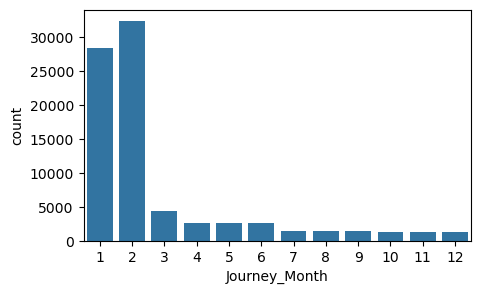

In [9]:
plt.figure(figsize=(5,3))
sns.countplot(x="Journey_Month", data=df)

In [10]:
# plt.figure(figsize=(6,3))
# sns.countplot(x="Journey_DOW", data=df)

In [11]:
# max_prices = df.groupby("Journey_DOW")["Price"].mean()
# plt.figure(figsize=(6, 3))
# plt.scatter(max_prices.index, max_prices.values, color='b', marker='o')
# plt.xlabel('Day of the Week')
# plt.ylabel('Max Price')
# plt.title('Max Price by Day of the Week')
# plt.show()

## Departure_Time

In [12]:
df["Dep_Hour"] = pd.to_datetime(df["Departure_Time"]).dt.hour

/tmp/ipykernel_274307/207793956.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Hour"] = pd.to_datetime(df["Departure_Time"]).dt.hour


In [13]:
df["Dep_Minute"] = pd.to_datetime(df["Departure_Time"]).dt.minute

/tmp/ipykernel_274307/2798108140.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dep_Minute"] = pd.to_datetime(df["Departure_Time"]).dt.minute


In [14]:
df.drop("Departure_Time",axis=1,inplace=True)

<Axes: xlabel='Dep_Hour', ylabel='Count'>

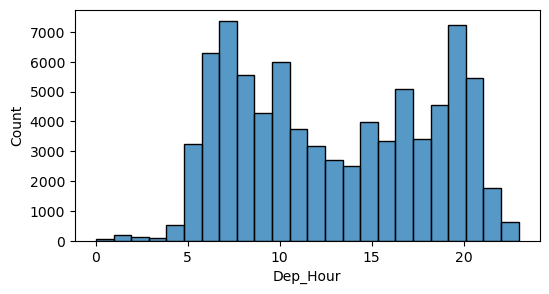

In [15]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Dep_Hour",bins=24)

## Arrival_Time

In [16]:
df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour

/tmp/ipykernel_274307/1971985902.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour


In [17]:
df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute

/tmp/ipykernel_274307/3257876746.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Arrival_Minute"] = pd.to_datetime(df["Arrival_Time"]).dt.minute


In [18]:
df.drop("Arrival_Time",axis=1,inplace=True)

<Axes: xlabel='Arrival_Hour', ylabel='Count'>

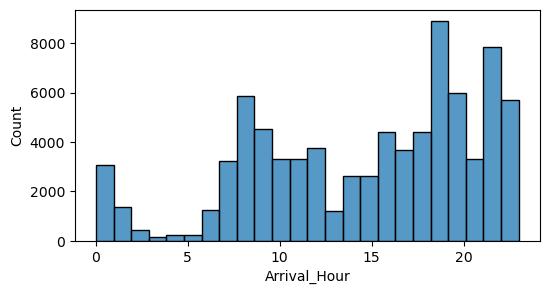

In [19]:
plt.figure(figsize=(6,3))
sns.histplot(data=df, x="Arrival_Hour",bins=24)

## Duration

<Axes: xlabel='Duration_in_mins', ylabel='Count'>

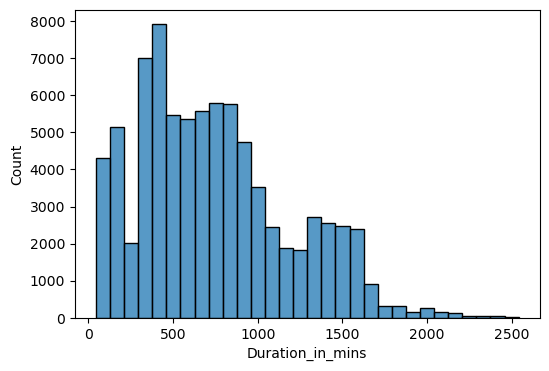

In [20]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Duration_in_mins",bins=30)

<Axes: xlabel='Duration_in_mins', ylabel='Price'>

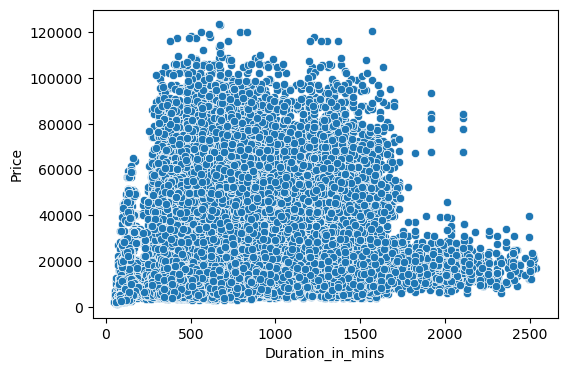

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Duration_in_mins", y="Price")

In [22]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from scipy.stats import boxcox
# from sklearn.preprocessing import StandardScaler

# df['Optimal_Transformed_Duration'], _ = boxcox(df['Duration_in_mins'] + 1)

In [23]:
# df.drop(columns=['Duration_in_mins'], inplace=True)

# df.rename(columns={
#     'Optimal_Transformed_Duration': 'Duration_in_mins',

# }, inplace=True)

# # Verify the changes
# df.head()

In [24]:
df['Total Stops'].value_counts()

Total Stops
1-stop                                          65852
non-stop                                         9408
2+-stop                                          5555
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR           275
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore         56
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Pune           46
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi          43
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati       17
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR            14
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PNQ            11
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai         10
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ             8
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia DIB             1
Name: count, dtype: int64

In [25]:
# Clean up variations of '1-stop'
df['Total Stops'] = df['Total Stops'].apply(lambda x: '1-stop' if x.strip().startswith('1-stop') else x)

# Check the result
print(df['Total Stops'].value_counts())

Total Stops
1-stop      66333
non-stop     9408
2+-stop      5555
Name: count, dtype: int64


In [26]:
df["Total Stops"] = df["Total Stops"].replace({"non-stop" : 0,
                                                         "1-stop" : 1,
                                                         "2+-stop" : 2})

/tmp/ipykernel_274307/1712726908.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Total Stops"] = df["Total Stops"].replace({"non-stop" : 0,


In [27]:
df.sample(20)

,StandardDateofBooking,Month_of_Journey,Airline_Company,Flight_Number,Flight_Class,Departure_City,Arrival_City,Duration_in_mins,Total Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
28857,2023-01-15,2,Air India,AI-532,ECONOMY,Ahmedabad,Bangalore,805.0,1,25317.0,16,2,21,30,10,55
58895,2023-01-15,1,Indigo,6E- 245,ECONOMY,Kolkata,Ahmedabad,180.0,0,8607.0,2,1,5,35,8,35
20360,2023-01-15,2,Air India,AI-532,BUSINESS,Ahmedabad,Chennai,1305.0,1,70561.0,27,2,21,30,19,15
52263,2023-01-15,2,Air India,AI-505,BUSINESS,Bangalore,Mumbai,885.0,1,54879.0,24,2,10,0,0,45
79825,2023-01-15,9,Vistara,UK-810,BUSINESS,Bangalore,Mumbai,725.0,1,54879.0,2,9,7,0,19,5
63439,2023-01-15,2,Air India,AI-575,BUSINESS,Chennai,Delhi,1350.0,1,45345.0,15,2,20,10,18,40
63338,2023-01-15,1,Air India,AI-645,BUSINESS,Mumbai,Delhi,410.0,1,50287.0,18,1,9,25,16,15
44617,2023-01-15,4,Vistara,UK-946,PREMIUMECONOMY,Ahmedabad,Chennai,1545.0,1,20477.0,2,4,8,40,10,25
59478,2023-01-15,2,Vistara,UK-814,PREMIUMECONOMY,Bangalore,Mumbai,925.0,1,14447.0,20,2,21,10,12,35
33503,2023-01-15,1,Air India,AI-515,ECONOMY,Hyderabad,Delhi,465.0,1,7880.0,30,1,10,15,18,0


<Axes: xlabel='Total Stops', ylabel='count'>

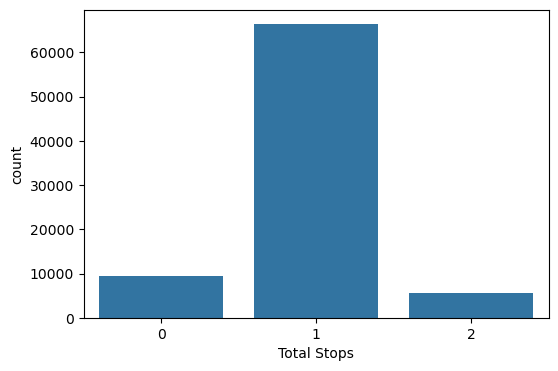

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x="Total Stops", data=df)

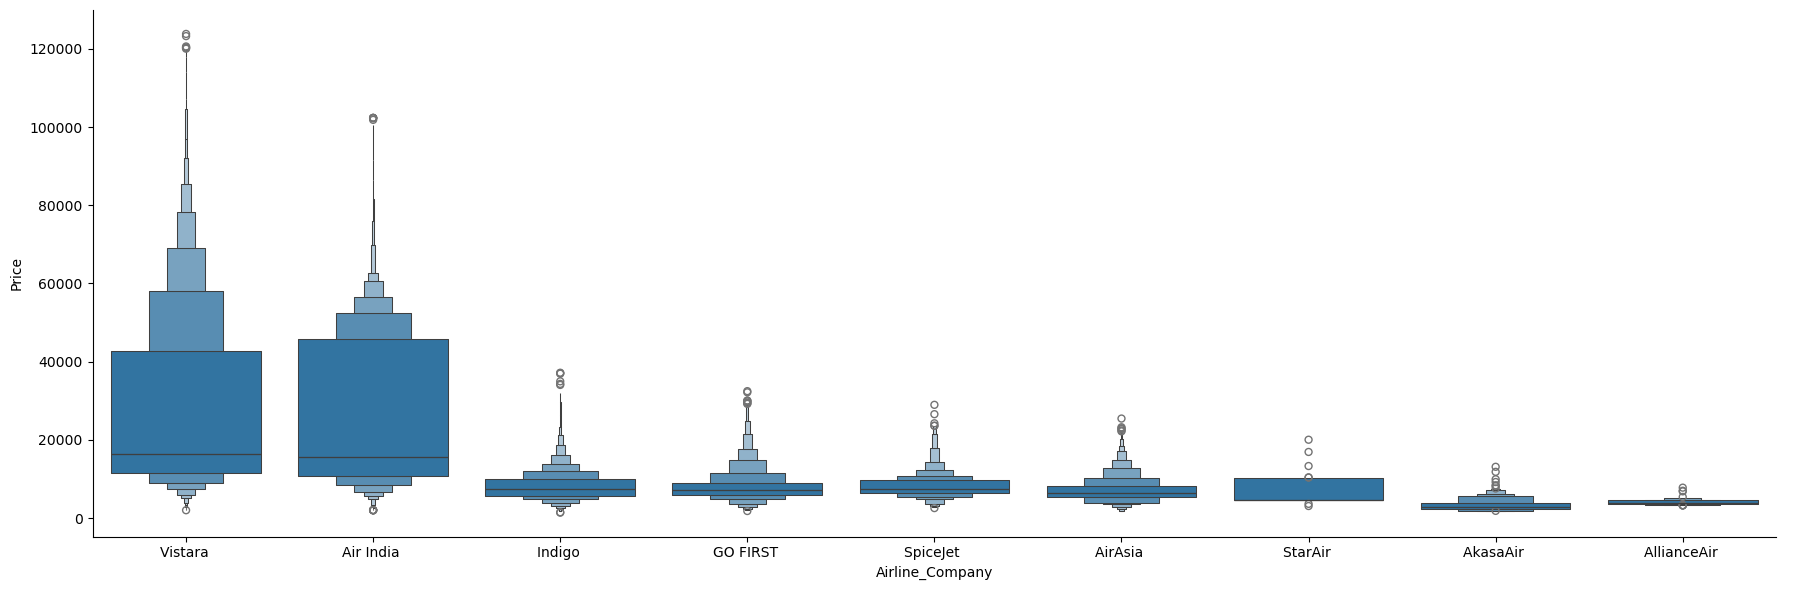

In [29]:
sns.catplot(y = "Price", x = "Airline_Company", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [30]:
df["Airline_Company"].value_counts()

Airline_Company
Vistara         41539
Air India       21462
Indigo          11970
AirAsia          2829
GO FIRST         1940
SpiceJet         1072
AkasaAir          395
AllianceAir        71
StarAir            18
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=np.int32)

# Fit and transform the data
encoded_features = ohe.fit_transform(df[['Airline_Company', 'Departure_City', 'Arrival_City']])

# Convert the result to a DataFrame for better readability
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out(['Airline_Company', 'Departure_City', 'Arrival_City']))

# Concatenate the original DataFrame (excluding the original columns) with the encoded DataFrame
df_encoded = pd.concat([df.drop(columns=['Airline_Company', 'Departure_City', 'Arrival_City']), encoded_df], axis=1)

df = df_encoded.copy()

In [32]:
df.head()

,StandardDateofBooking,Month_of_Journey,Flight_Number,Flight_Class,Duration_in_mins,Total Stops,Price,Journey_Day,Journey_Month,Dep_Hour,...,Departure_City_Delhi,Departure_City_Hyderabad,Departure_City_Kolkata,Departure_City_Mumbai,Arrival_City_Bangalore,Arrival_City_Chennai,Arrival_City_Delhi,Arrival_City_Hyderabad,Arrival_City_Kolkata,Arrival_City_Mumbai
0,2023-01-15,2,UK-890,BUSINESS,140.0,0,24469.0,3,2,17,...,0,1,0,0,0,0,1,0,0,0
1,2023-01-15,1,AI-481,BUSINESS,1390.0,1,39114.0,27,1,10,...,0,0,0,0,0,0,1,0,0,0
2,2023-01-15,4,UK-812,ECONOMY,470.0,1,13008.0,3,4,9,...,0,0,0,0,0,0,0,0,0,1
3,2023-01-15,2,AI-893,ECONOMY,690.0,1,9406.0,23,2,16,...,0,0,0,0,0,0,1,0,0,0
4,2023-01-15,2,AI-818,BUSINESS,665.0,1,47332.0,16,2,7,...,0,0,0,0,0,0,0,0,1,0


In [33]:
df = df.drop(['StandardDateofBooking', 'Flight_Number'], axis=1)

In [34]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

encoder = OrdinalEncoder(categories=[['ECONOMY', 'PREMIUMECONOMY', 'BUSINESS', 'FIRST']])

df['Flight_Class_Encoded'] = encoder.fit_transform(df[['Flight_Class']])

df.head()

,Month_of_Journey,Flight_Class,Duration_in_mins,Total Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,...,Departure_City_Hyderabad,Departure_City_Kolkata,Departure_City_Mumbai,Arrival_City_Bangalore,Arrival_City_Chennai,Arrival_City_Delhi,Arrival_City_Hyderabad,Arrival_City_Kolkata,Arrival_City_Mumbai,Flight_Class_Encoded
0,2,BUSINESS,140.0,0,24469.0,3,2,17,40,20,...,1,0,0,0,0,1,0,0,0,2.0
1,1,BUSINESS,1390.0,1,39114.0,27,1,10,40,9,...,0,0,0,0,0,1,0,0,0,2.0
2,4,ECONOMY,470.0,1,13008.0,3,4,9,45,17,...,0,0,0,0,0,0,0,0,1,0.0
3,2,ECONOMY,690.0,1,9406.0,23,2,16,20,3,...,0,0,0,0,0,1,0,0,0,0.0
4,2,BUSINESS,665.0,1,47332.0,16,2,7,55,19,...,0,0,0,0,0,0,0,1,0,2.0


In [35]:
df = df.drop(['Flight_Class'], axis=1)

<Axes: >

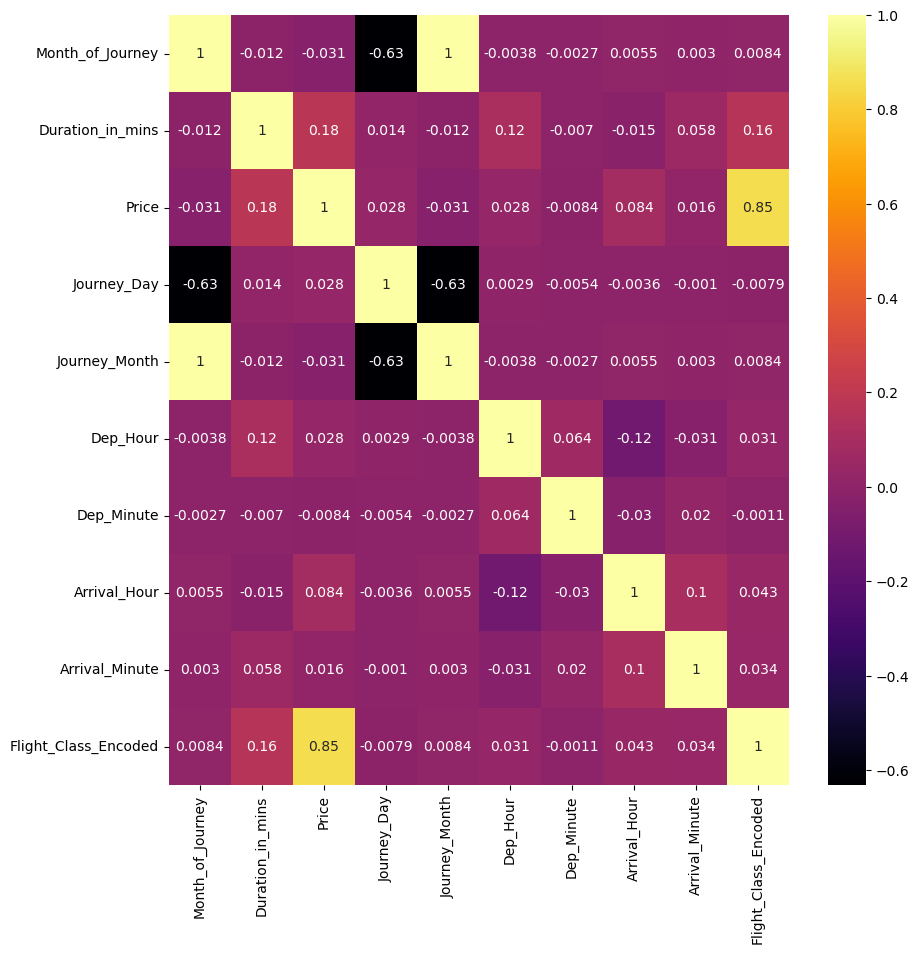

In [36]:
columns = [col for col in df.columns if df[col].nunique()>3]
plt.figure(figsize=(10,10))
sns.heatmap(df[columns].corr(),annot=True,cmap="inferno")

In [37]:
df.to_csv('final_transformed_test_data.csv', index=False)